In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./diabetes_data.csv")

In [3]:
sns.set(style='whitegrid')

In [4]:
df.columns


Index(['gender', 'age', 'hypertension', 'diabetes_pedigree_function',
       'diet_type', 'star_sign', 'BMI', 'weight', 'family_diabetes_history',
       'social_media_usage', 'physical_activity_level', 'sleep_duration',
       'stress_level', 'pregnancies', 'alcohol_consumption', 'diabetes'],
      dtype='object')

In [6]:
### check the length of the dataset 
df.shape

(100000, 16)

In [5]:
df.head(15)

,gender,age,hypertension,diabetes_pedigree_function,diet_type,star_sign,BMI,weight,family_diabetes_history,social_media_usage,physical_activity_level,sleep_duration,stress_level,pregnancies,alcohol_consumption,diabetes
0,female,NaN,NaN,0.37,paleo,NaN,NaN,197.7,NaN,Occasionally,Sedentary,1.5,Low,NaN,light,1.0
1,male,59.0,0.0,0.73,NaN,Leo,17.1,156.5,0.0,Occasionally,Lightly Active,5.4,Moderate,0.0,none,1.0
2,female,31.0,NaN,NaN,NaN,NaN,22.5,137.8,NaN,Occasionally,Lightly Active,7.6,Low,0.0,light,1.0
3,female,81.0,1.0,0.37,pescatarian,NaN,NaN,108.2,0.0,NaN,Sedentary,7.7,Low,1.0,heavy,NaN
4,NaN,64.0,0.0,0.55,carnivore,NaN,NaN,179.7,NaN,Occasionally,Sedentary,7.8,NaN,0.0,heavy,1.0
5,male,50.0,0.0,0.43,low carb,NaN,NaN,NaN,0.0,Excessive,Lightly Active,4.7,Moderate,0.0,moderate,1.0
6,male,NaN,0.0,0.21,vegetarian,Capricorn,24.8,91.1,1.0,Never,Sedentary,1.1,Moderate,0.0,NaN,1.0
7,female,67.0,0.0,0.27,mediterranean,Scorpio,21.2,NaN,0.0,Moderate,Moderately Active,6.8,Moderate,1.0,NaN,1.0
8,NaN,46.0,0.0,0.61,vegetarian,Virgo,NaN,210.7,1.0,NaN,Lightly Active,5.7,Low,0.0,none,1.0
9,NaN,24.0,0.0,0.31,raw food,Taurus,30.7,210.5,1.0,Never,Sedentary,10.1,Extreme,0.0,moderate,1.0


### Distribution of the data fields

[]

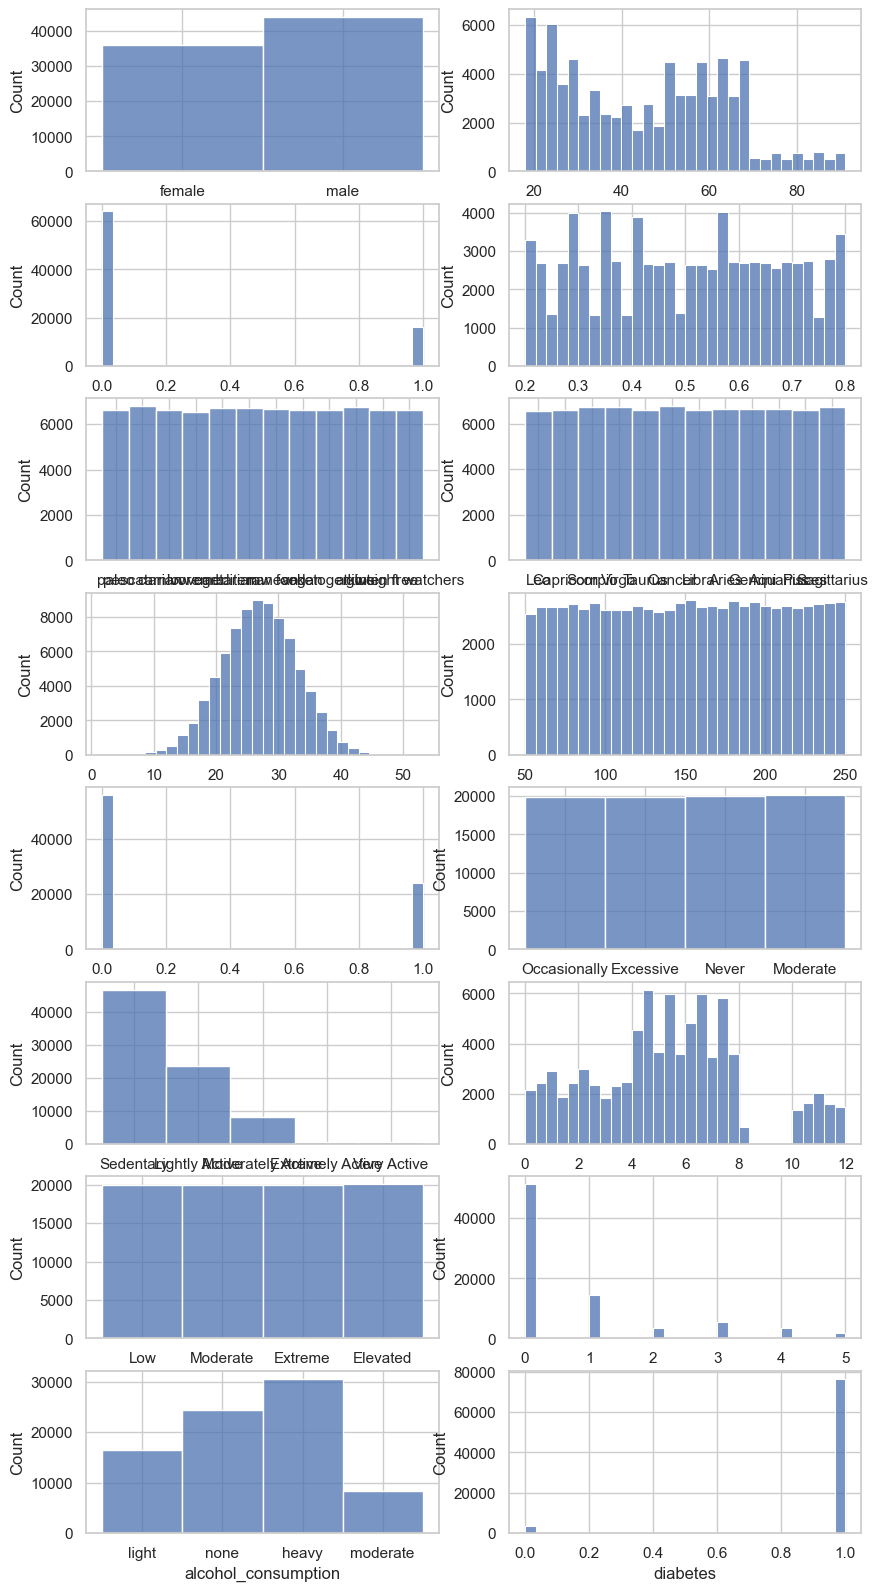

In [7]:
plt.figure(figsize = (10,40))
columns = df.columns
for i, col in enumerate(columns, 1):
    plt.subplot(len(columns), 2, i)
    sns.histplot(df[col].dropna(), bins = 30)
    plt.tight_layout


plt.plot()

### Data Distribution & Handling missing data

In [8]:
df_processed = df.dropna(subset = ["diabetes"])

In [9]:
df_processed.shape

(80242, 16)

In [10]:
### what is defined as a duplicate in this 
len(df_processed.drop_duplicates())

80242

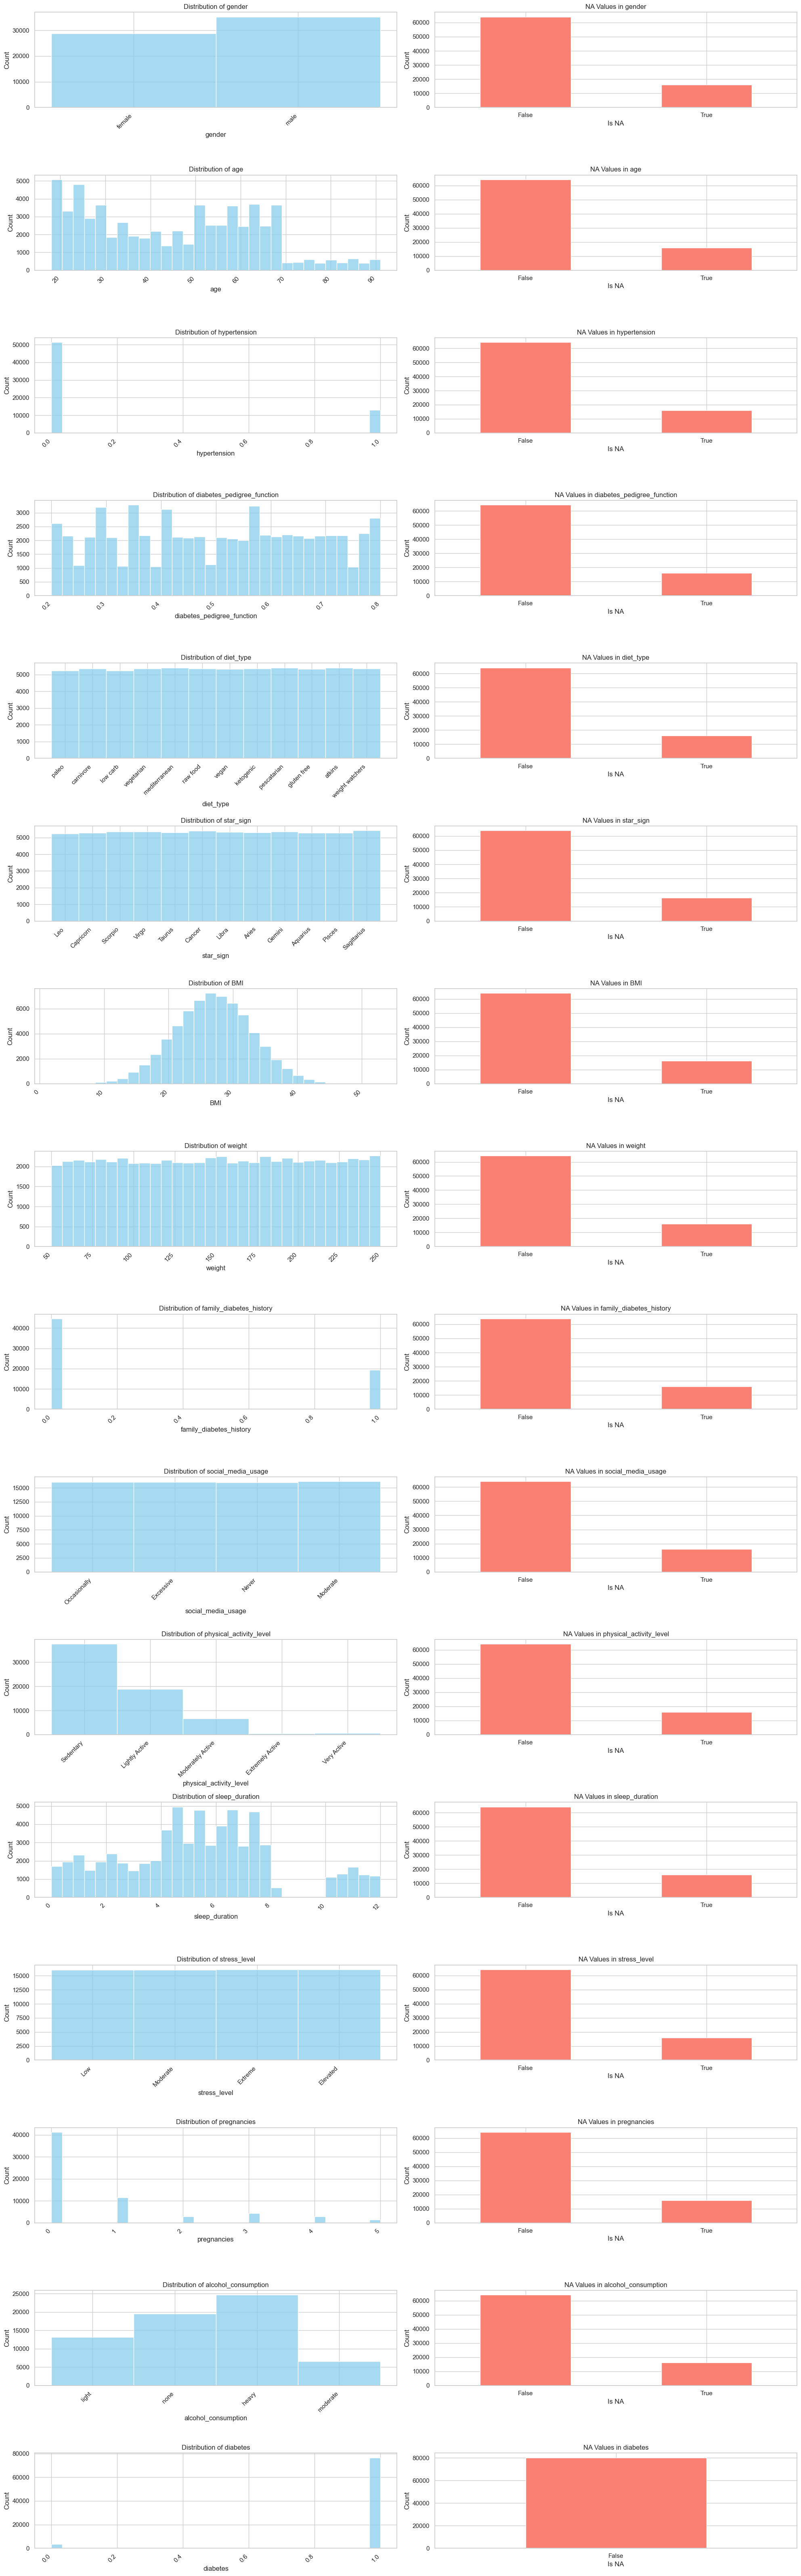

In [9]:
# check for na values
# Create a figure with space for both distribution and NA plots
plt.figure(figsize=(20, 4*len(df_processed.columns)))

columns = df_processed.columns
for i, col in enumerate(columns, 1):
    # Distribution plot
    plt.subplot(len(columns), 2, 2*i-1)
    sns.histplot(df_processed[col].dropna(), bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    
    # NA values plot
    plt.subplot(len(columns), 2, 2*i)
    na_counts = df_processed[col].isnull().value_counts()
    na_counts.plot(kind='bar', color='salmon')
    plt.title(f'NA Values in {col}')
    plt.xlabel('Is NA')
    plt.ylabel('Count')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Convert categorical variables

In [10]:
categorical_cols = df_processed.select_dtypes(include=['object', 'category']).columns
numerical_cols = df_processed.select_dtypes(include=['number']).columns

In [11]:
df_dummies = pd.get_dummies(df_processed[categorical_cols], drop_first = True)
df_dummies.head(10)

,gender_male,diet_type_carnivore,diet_type_gluten free,diet_type_ketogenic,diet_type_low carb,diet_type_mediterranean,diet_type_paleo,diet_type_pescatarian,diet_type_raw food,diet_type_vegan,...,physical_activity_level_Lightly Active,physical_activity_level_Moderately Active,physical_activity_level_Sedentary,physical_activity_level_Very Active,stress_level_Extreme,stress_level_Low,stress_level_Moderate,alcohol_consumption_light,alcohol_consumption_moderate,alcohol_consumption_none
0,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,True,False,True,False,False
1,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
5,True,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,True,False,True,False
6,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
7,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True
9,False,False,False,False,False,False,False,False,True,False,...,False,False,True,False,True,False,False,False,True,False
10,True,False,False,False,False,True,False,False,False,False,...,False,False,True,False,True,False,False,False,True,False


In [12]:
df_final = pd.concat([df_processed[numerical_cols], df_dummies], axis=1)

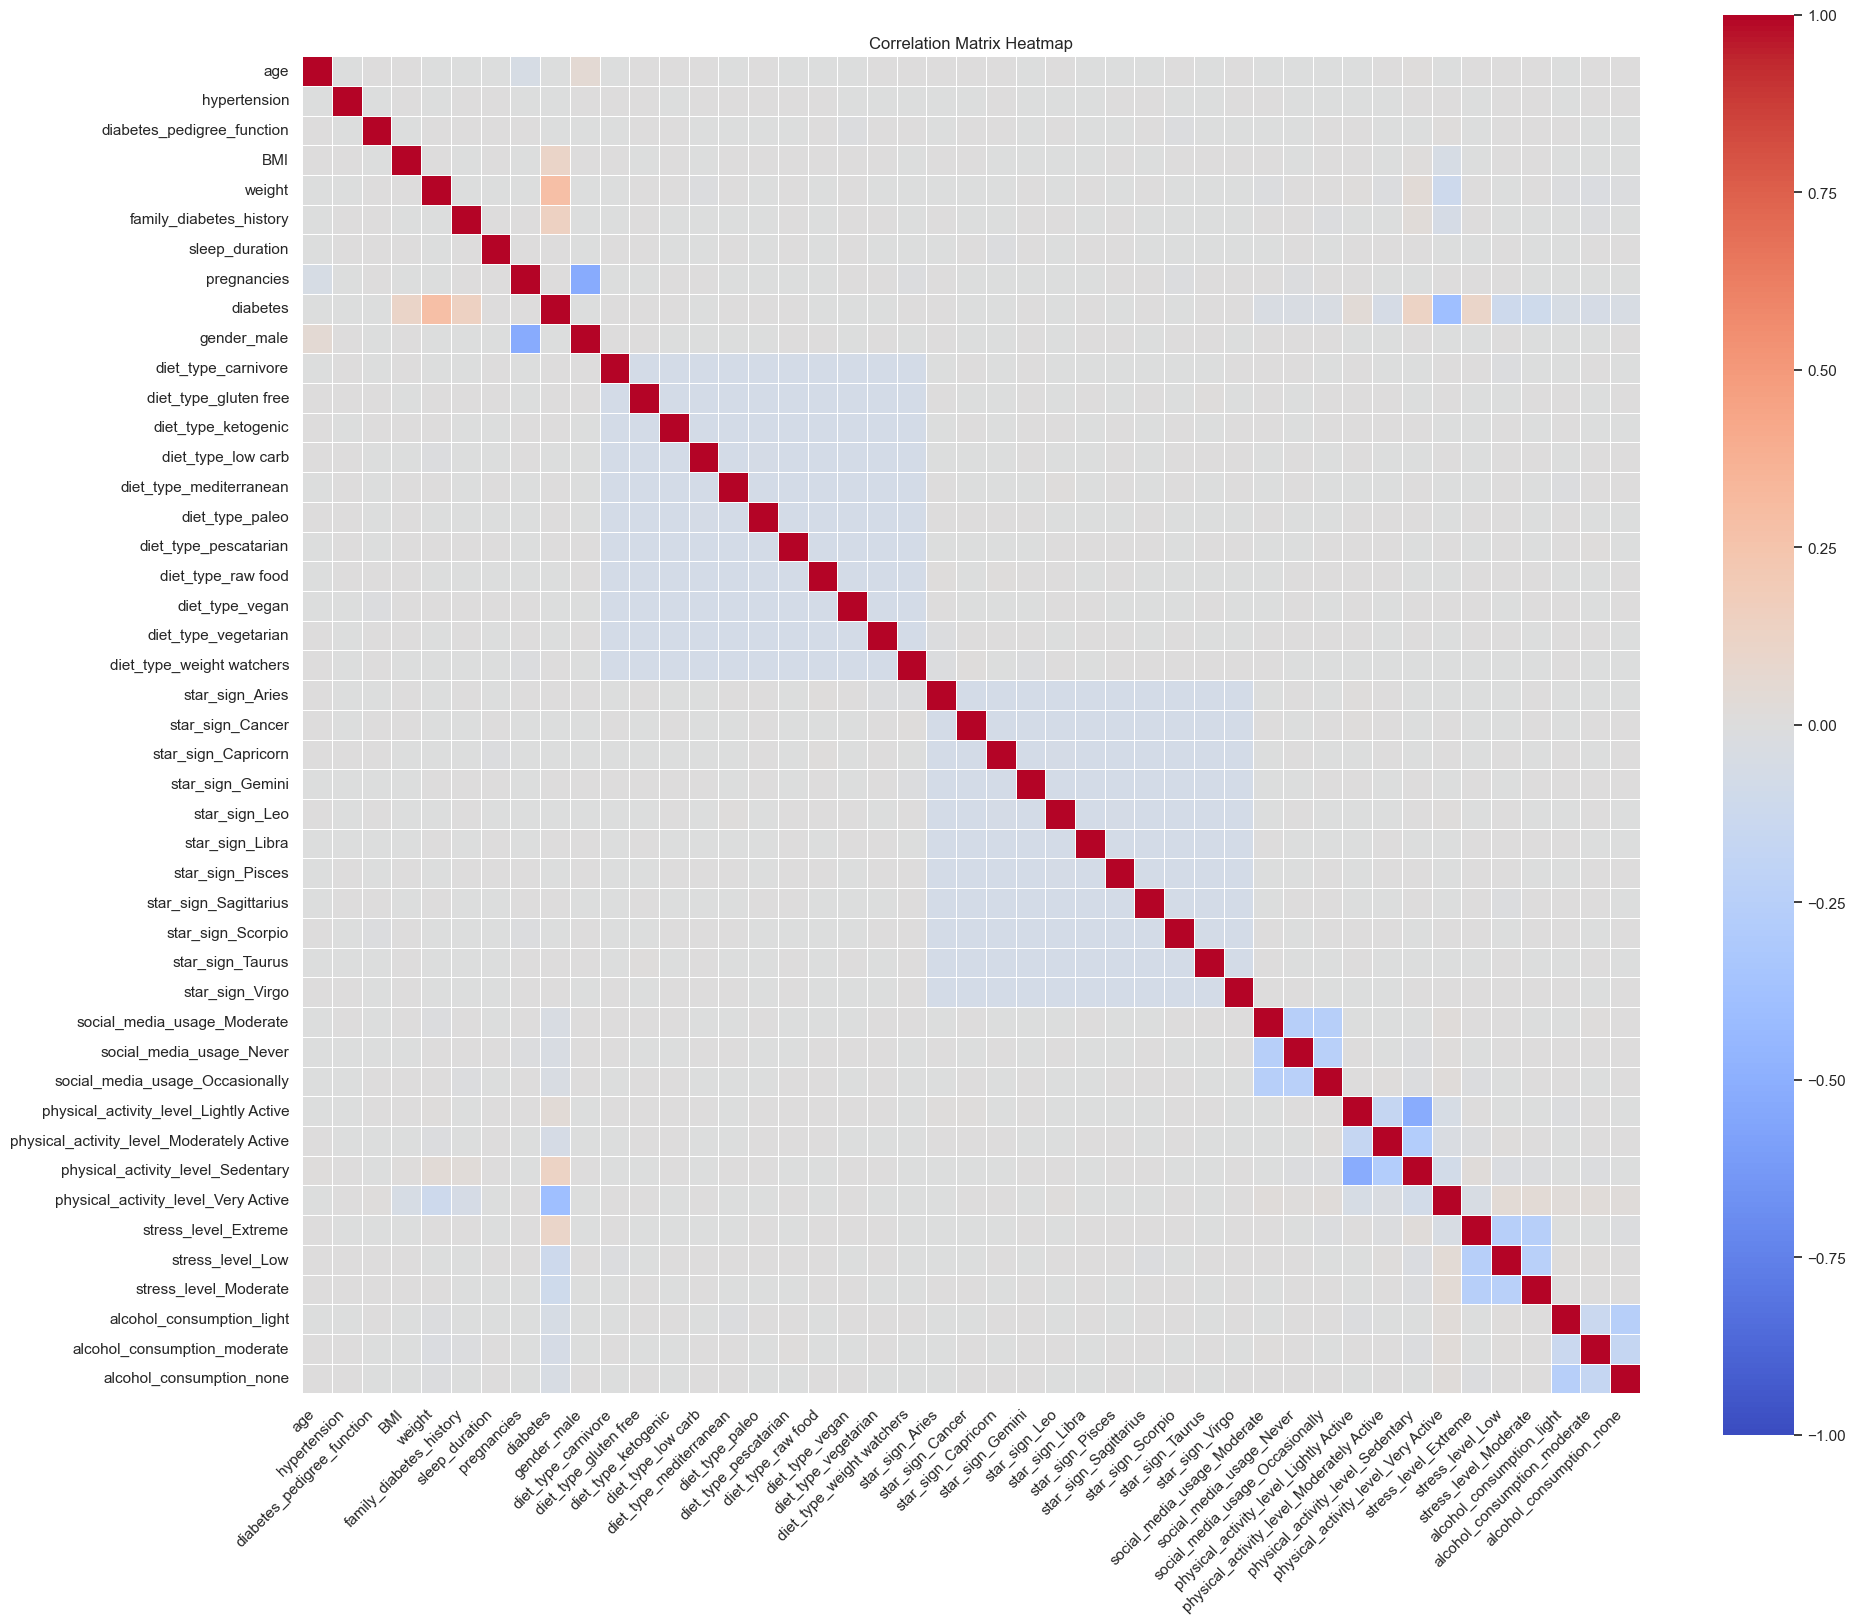

In [13]:
correlation_matrix = df_final.corr()

plt.figure(figsize=(20, 20))

sns.heatmap(
    correlation_matrix, 
    # annot=True,        # Show correlation coefficients
    # fmt='.2f',         # Format to 2 decimal places
    cmap='coolwarm',   # Color map
    vmin=-1, vmax=1,   # Set limits from -1 to 1
    square=True,       # Keep cells square-shaped
    linewidths=0.5,    # Add lines between cells
    cbar_kws={"shrink": 0.75}  # Adjust color bar size
)

plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

In [14]:
df_processed = df_processed.drop("star_sign",axis=1)
categorical_cols = df_processed.select_dtypes(include=['object', 'category']).columns
numerical_cols = df_processed.select_dtypes(include=['number']).columns
df_dummies = pd.get_dummies(df_processed[categorical_cols], drop_first = True)
df_final = pd.concat([df_processed[numerical_cols], df_dummies], axis=1)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC

In [16]:
df_dropna = df_final.dropna()

In [17]:
X = df_dropna.drop("diabetes",axis = 1)
y = df_dropna["diabetes"].replace(0, -1)


In [18]:
y = y.apply(lambda x: int(x))
print(y)

1        1
9        1
20       1
21       1
32       1
        ..
99946    1
99963    1
99974    1
99978    1
99985   -1
Name: diabetes, Length: 13558, dtype: int64


# SVM classifer with GridCV

In [21]:
## An SVC is a soft margin classifier (not a maximum margin classifier which are more sensitive to outliers)
## SVC tries to choose the best support vectors which then help decide the boundary/threhold (allowing for a few misclasisfications to generalize well) 
## The higher the C paramter, the more it tries to fit the dataset, trying to classify each and every point correctly. 

mod = SVC()
param_grid = {'C': [0.1, 0.2, 0.3], 
              'gamma': ['scale'],
              'kernel': ['linear', 'rbf']}  

grid = GridSearchCV(mod, param_grid, refit = True, verbose = 3, scoring = 'accuracy')

grid.fit(X, y)
allscores= grid.cv_results_['mean_test_score']
print(allscores)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.973 total time=   0.5s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.976 total time=   0.5s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.975 total time=   0.5s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.974 total time=   0.4s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.980 total time=   0.4s
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.956 total time=   0.6s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.955 total time=   0.6s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.955 total time=   0.6s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.956 total time=   0.6s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.956 total time=   0.6s
[CV 1/5] END .C=0.2, gamma=scale, kernel=linear;, score=0.972 total time=   0.6s
[CV 2/5] END .C=0.2, gamma=scale, kernel=linear;,

In [22]:
print(grid.best_params_)

{'C': 0.2, 'gamma': 'scale', 'kernel': 'linear'}


In [23]:
## create a model instance 
model = SVC(C = 0.2, gamma ="scale", kernel = "linear")

In [24]:

## train the model based on the hyperparameter optimization 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [27]:
print(len(model.support_vectors_))

604


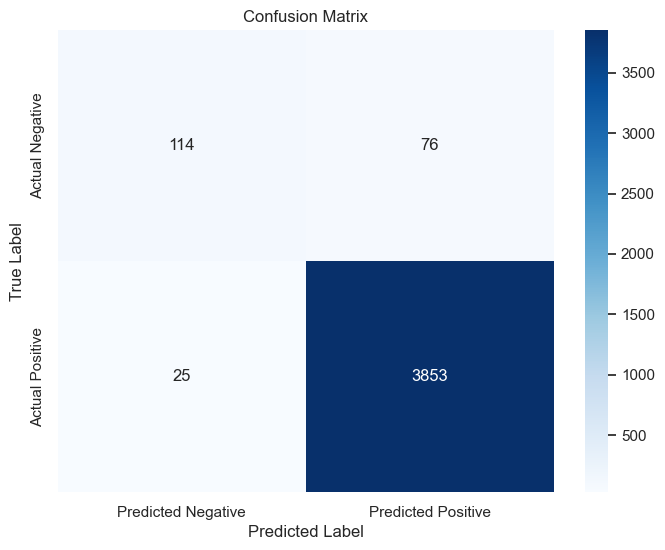

In [25]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

R² Score: 0.30
Mean Absolute Error (MAE): 0.09
Root Mean Squared Error (RMSE): 0.17


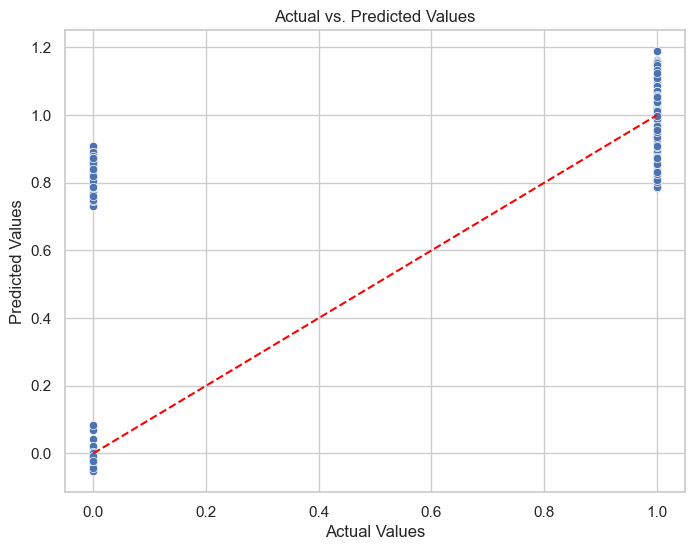

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R² Score: {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix



Accuracy: 0.99
Precision: 0.99
Recall: 1.00
F1 Score: 0.99
ROC AUC Score: 1.00

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.79      0.84       171
         1.0       0.99      1.00      0.99      3897

    accuracy                           0.99      4068
   macro avg       0.94      0.89      0.92      4068
weighted avg       0.99      0.99      0.99      4068



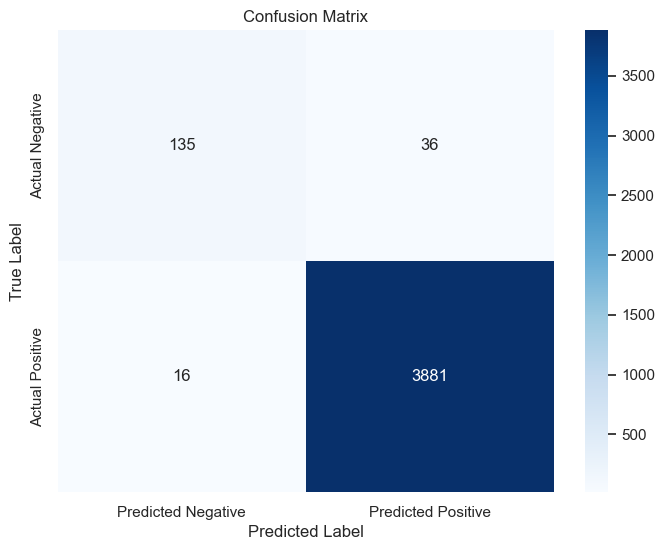

In [63]:
model = HistGradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)
roc_auc = roc_auc_score(y_test, y_proba)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Feature Importance Plot (Optional)
if hasattr(model, 'feature_importances_'):
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    top_features = feature_importances.sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    top_features.plot(kind='barh')
    plt.title('Top 10 Feature Importances')
    plt.gca().invert_yaxis()
    plt.show()

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mice_imputer = IterativeImputer(random_state=42)
df_imputed = mice_imputer.fit_transform(df_final)

In [22]:
df_test = pd.DataFrame(df_imputed, columns=df_final.columns)

In [23]:
df_test

,age,hypertension,diabetes_pedigree_function,BMI,weight,family_diabetes_history,sleep_duration,pregnancies,diabetes,gender_male,...,physical_activity_level_Lightly Active,physical_activity_level_Moderately Active,physical_activity_level_Sedentary,physical_activity_level_Very Active,stress_level_Extreme,stress_level_Low,stress_level_Moderate,alcohol_consumption_light,alcohol_consumption_moderate,alcohol_consumption_none
0,44.455601,0.200557,0.370000,27.347230,197.700000,0.308207,1.5,1.327849,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,59.000000,0.000000,0.730000,17.100000,156.500000,0.000000,5.4,0.000000,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,31.000000,0.202222,0.502428,22.500000,137.800000,0.344197,7.6,0.000000,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,64.000000,0.000000,0.550000,27.032032,179.700000,0.286874,7.8,0.000000,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50.000000,0.000000,0.430000,27.305112,157.491318,0.000000,4.7,0.000000,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80237,24.000000,0.203722,0.290000,18.900000,56.000000,0.000000,2.6,0.000000,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
80238,53.000000,1.000000,0.640000,28.400000,140.800000,0.319936,7.5,0.000000,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
80239,61.000000,0.000000,0.340000,27.199626,156.767042,0.311038,2.8,0.000000,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
80240,46.294065,0.000000,0.710000,28.800000,123.600000,0.000000,0.4,0.000000,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [70]:
X_processed = df_test.drop("diabetes",axis=1)
y_processed = df_test["diabetes"]

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

Accuracy: 0.96
Precision: 0.96
Recall: 1.00
F1 Score: 0.98
ROC AUC Score: 1.00

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.20      0.34      1113
         1.0       0.96      1.00      0.98     22960

    accuracy                           0.96     24073
   macro avg       0.98      0.60      0.66     24073
weighted avg       0.96      0.96      0.95     24073



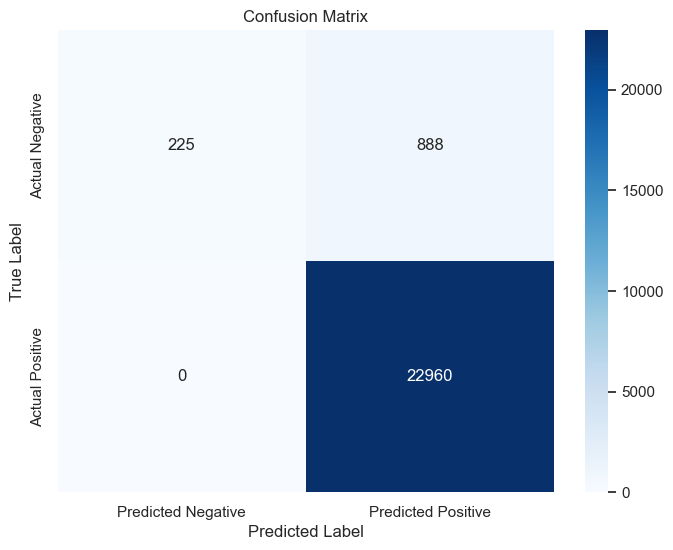

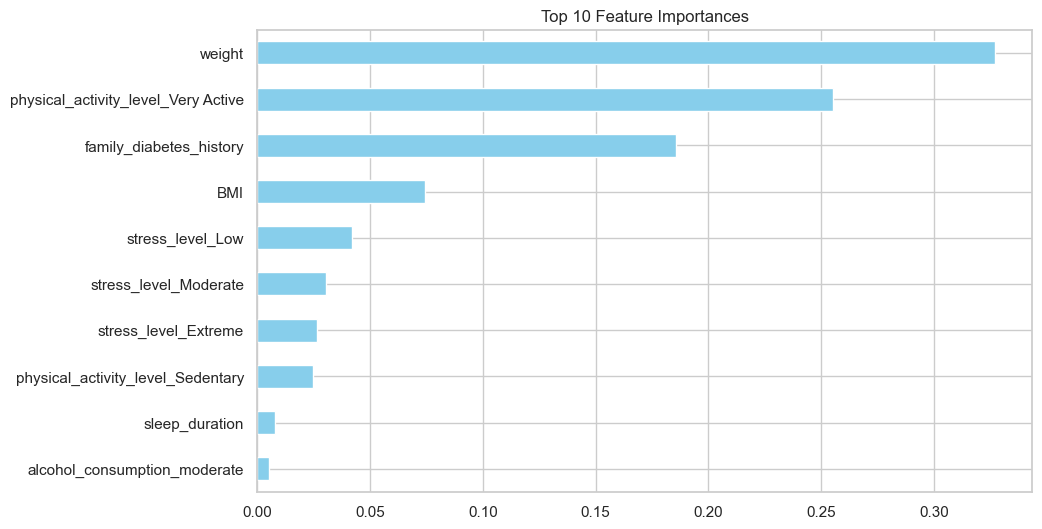

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=0.3, random_state=42)

# Step 5: Initialize and Train the Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth= 5)
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Step 7: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)
roc_auc = roc_auc_score(y_test, y_proba)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Step 8: Feature Importance Plot (Optional)
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='skyblue')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [76]:
from sklearn.tree import plot_tree


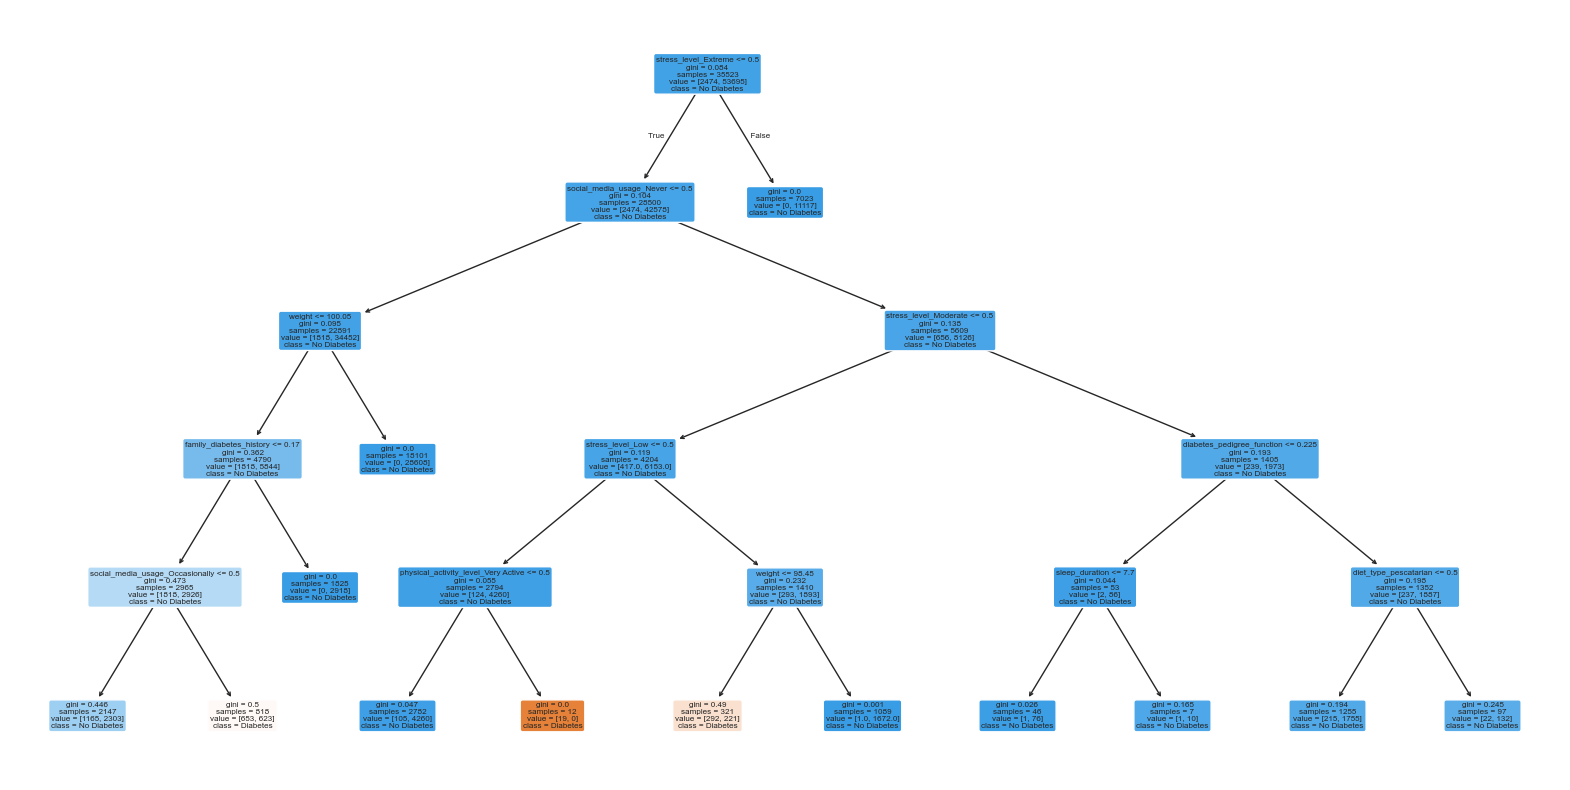

In [82]:
# Plot a single tree from the Random Forest
plt.figure(figsize=(20, 10))  # Adjust the size as needed
plot_tree(model.estimators_[0], filled=True, feature_names=X_processed.columns, class_names=["Diabetes","No Diabetes"], rounded=True)
plt.show()

### feature engineering

In [16]:
# Create Age Group feature
df_processed['Age Group'] = pd.cut(
    df_processed['age'], 
    bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
    labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
)

# Create BMI Group feature
def categorize_bmi(bmi):
    if pd.isna(bmi):
        return 'Unknown'
    elif bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Healthy Range'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obesity'

df_processed['BMI Group'] = df_processed['BMI'].apply(categorize_bmi)

# Optional: Quick verification
print(df_processed['Age Group'].value_counts())
print(df_processed['BMI Group'].value_counts())

Age Group
21-30     14691
51-60     12276
61-70     11291
31-40      8927
41-50      7714
11-20      5077
71-80      2055
81-90      2039
91-100      195
0-10          0
Name: count, dtype: int64
BMI Group
Overweight       20632
Obesity          19909
Healthy Range    18554
Unknown          16162
Underweight       4985
Name: count, dtype: int64


### Clustering

                age  hypertension  diabetes_pedigree_function       BMI  \
Cluster_0  1.003495      1.012084                    1.003822  1.017770   
Cluster_1  0.999637      0.999847                    0.997802  1.002135   
Cluster_2  1.000878      0.982626                    0.995264  0.993667   
Cluster_3  0.994669      1.009328                    1.008184  1.007686   
Cluster_4  1.000054      1.003278                    1.000926  0.997827   

             weight  family_diabetes_history  sleep_duration  pregnancies  \
Cluster_0  0.999137                 0.998267        0.989779     1.009972   
Cluster_1  0.988363                 0.993148        1.001692     1.008027   
Cluster_2  0.997272                 1.007578        1.000812     0.995117   
Cluster_3  1.006900                 1.003937        0.989523     0.990421   
Cluster_4  1.004763                 0.999661        1.001770     0.998351   

           gender_male  diet_type_carnivore  ...  \
Cluster_0     0.999190         5.5

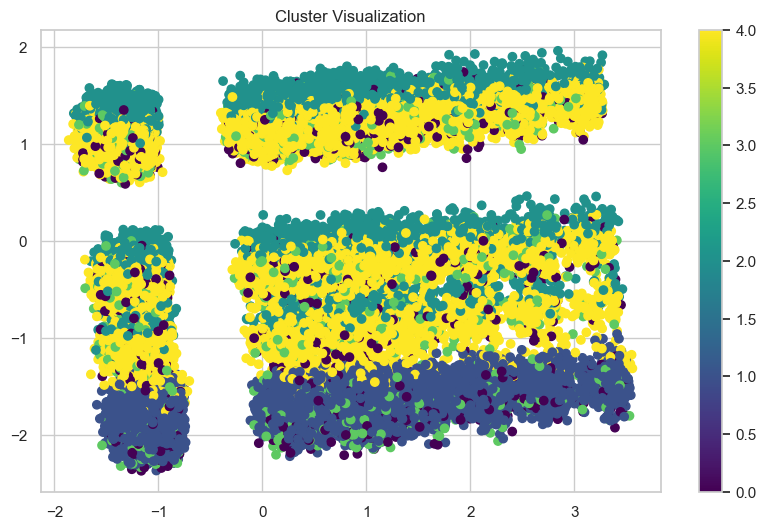

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Select numerical features for clustering
X = df_test.drop("diabetes",axis = 1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
df_processed['Cluster'] = kmeans.fit_predict(X_scaled)

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_summary = pd.DataFrame(cluster_centers, columns=X.columns)
cluster_summary.index.name = 'Cluster'

# Calculate feature importance for each cluster
def calculate_cluster_feature_importance(X_scaled, labels):
    feature_importance = {}
    for cluster in range(len(np.unique(labels))):
        cluster_data = X_scaled[labels == cluster]
        importance = {}
        for feature in range(X_scaled.shape[1]):
            feature_values = cluster_data[:, feature]
            importance[X.columns[feature]] = np.std(feature_values)
        feature_importance[f'Cluster_{cluster}'] = importance

    # Convert to DataFrame
    importance_df = pd.DataFrame.from_dict(feature_importance, orient='index')
    return importance_df

# Calculate and save feature importance
cluster_feature_importance = calculate_cluster_feature_importance(X_scaled, df_processed['Cluster'])
print(cluster_feature_importance)

# Optional: Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_processed['Cluster'], cmap='viridis')
plt.title('Cluster Visualization')
plt.colorbar(scatter)
plt.show()

In [45]:
cluster_feature_importance.round(2).T

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4
age,1.00,1.00,1.00,0.99,1.00
hypertension,1.01,1.00,0.98,1.01,1.00
diabetes_pedigree_function,1.00,1.00,1.00,1.01,1.00
BMI,1.02,1.00,0.99,1.01,1.00
weight,1.00,0.99,1.00,1.01,1.00
family_diabetes_history,1.00,0.99,1.01,1.00,1.00
sleep_duration,0.99,1.00,1.00,0.99,1.00
pregnancies,1.01,1.01,1.00,0.99,1.00
gender_male,1.00,1.00,1.00,1.00,1.00
diet_type_carnivore,0.00,1.08,1.08,0.00,1.06


In [44]:
# Analyze cluster relationship to diabetes
cluster_diabetes_summary = df_processed.groupby('Cluster')['diabetes'].value_counts(normalize=True).unstack()
print("\nDiabetes Prevalence by Cluster:")
print(cluster_diabetes_summary)


Diabetes Prevalence by Cluster:
diabetes       0.0       1.0
Cluster                     
0         0.049580  0.950420
1         0.032258  0.967742
2         0.006449  0.993551
3         0.044490  0.955510
4         0.063806  0.936194


In [48]:
df_processed.to_csv("processed_dataset.csv")